In [1]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import parc
import scipy.cluster.hierarchy as sch
import matplotlib
from collections import defaultdict
import logging
import matplotlib
from skimage import exposure

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import path for config
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

# Import path for src
module_path = str(Path.cwd().parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from config import *
import my_io as io

# Import metadata information

In [5]:
df_metadata = pd.read_csv(data_dir / 'metadata.csv')
df_metadata.head()

Pos Grades Stage                                         Directory
0  B1      2     I  Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI001_B1
1  B3      2     I  Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI005_B3
2  B5      2    II  Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI006_B5
3  C6     AT    AT  Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI007_C6
4  D7      3  IIIA  Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI008_D7

In [6]:
datasets = df_metadata.Directory.to_list()
datasets = [name.split('\\')[-1] for name in datasets]

In [7]:
print(datasets)

['ROI001_B1', 'ROI005_B3', 'ROI006_B5', 'ROI007_C6', 'ROI008_D7', 'ROI009_D9', 'ROI012_E1', 'ROI015_B6', 'ROI016_F3', 'ROI017_F2', 'ROI018_G1', 'ROI019_G5', 'ROI020_E5', 'ROI021_E7']


In [8]:
# Define which dataset to work on 
dataset = datasets[0]

In [9]:
imgs, markers = io.read_img(dataset, data_ROI)
df_pixels = pd.DataFrame(imgs.reshape(len(markers), -1).T, columns=markers)
print(f'Image stack shape of {len(df_pixels)}')

Image stack shape of 640000


In [10]:
markers

['SMA',
 'Vimentin',
 'PanKeratin',
 'H3K9me3',
 'PDL1',
 'CD44',
 'FoxP3',
 'CD4',
 'ECadherin',
 'CD68',
 'CD20',
 'CD8a',
 'PD1',
 'GranzymeB',
 'Ki67',
 'Col1',
 'CD3',
 'Histone3',
 'CD45RO',
 'MHCII',
 'DNA1',
 'DNA2']

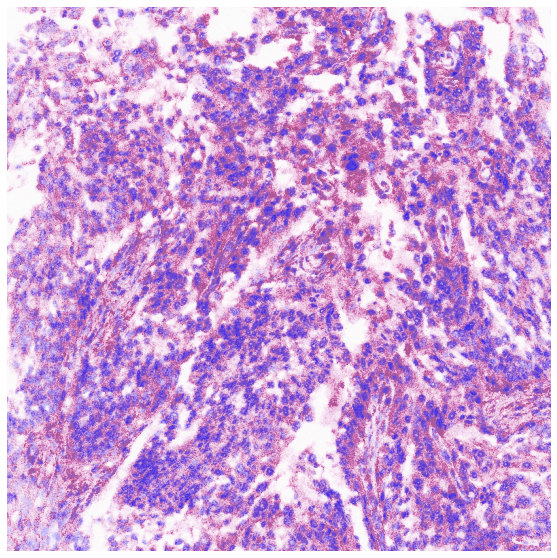

In [11]:
nuclei_markers = ['Histone3',  'H3K9me3', 'Ki67', 'FoxP3', 'DNA1', 'DNA2']
cyto_markers = ['Vimentin', 'CD68', 'MHCII', 'GranzymeB', 'CD20', 'ECadherin','PanKeratin']
for dataset in datasets:
    imgs, markers = io.read_img(dataset, data_ROI)
    df_pixels = pd.DataFrame(imgs.reshape(len(markers), -1).T, columns=markers)

    avg_imgs = []
    for i, img in enumerate(imgs):
        if markers[i] in nuclei_markers:
            avg_imgs.append(img)
    img_nuclei = np.array(np.mean(avg_imgs, axis=(0)), dtype=np.uint8)

    avg_imgs = []
    for i, img in enumerate(imgs):
        if markers[i] not in nuclei_markers:
            avg_imgs.append(img)
    img_cyto = np.array(np.mean(avg_imgs, axis=(0)), dtype=np.uint8)

    # Stack all cluster representation together 
    data = np.stack((img_nuclei, img_cyto), axis=2)

    # Select colormap 
    cmap1 = plt.cm.PiYG_r
    # Get the colormap colors
    my_cmap1 = cmap1(np.linspace(0.5, 1.0, cmap1.N))
    # Set alpha
    my_cmap1[:,-1] = np.linspace(0.5, 1, cmap1.N)
    # Creat1e new colormap
    my_cmap1 = ListedColormap(my_cmap1)

    # Select colormap 
    cmap2 = plt.cm.bwr_r
    # Get the colormap colors
    my_cmap2 = cmap2(np.linspace(0.5, 1.0, cmap2.N))
    # Set alpha
    my_cmap2[:,-1] = np.linspace(0, 1, cmap2.N)
    # Creat1e new colormap
    my_cmap2 = ListedColormap(my_cmap2)

    max1 = np.max(img_cyto)
    max2 = np.max(img_nuclei)

    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(img_cyto, my_cmap1, vmax=max1//2.5, alpha=0.8)
    ax.imshow(img_nuclei, my_cmap2, vmax=max2)
    ax.axis('off')
    fig.savefig(f'{dataset}.png', bbox_inches='tight', dpi=100)
    plt.show()
    
    break

(-0.5, 799.5, 799.5, -0.5)

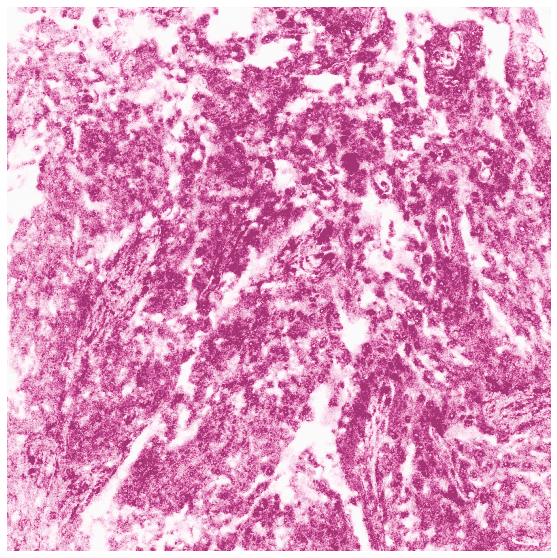

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img_cyto, my_cmap1, vmax=max1//2.5, alpha=0.8)
ax.axis('off')

(-0.5, 799.5, 799.5, -0.5)

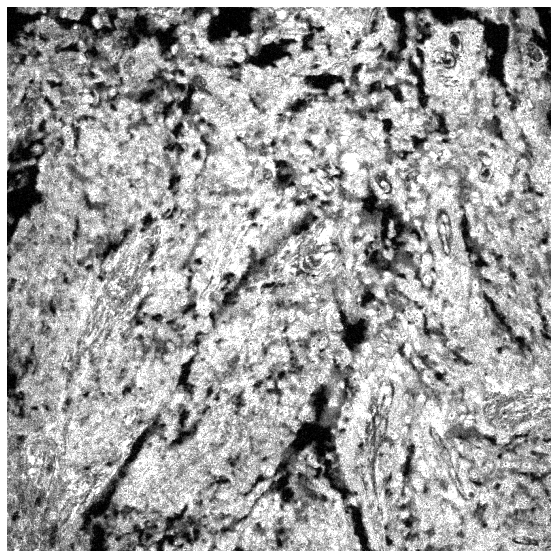

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img_cyto, cmap='gray', vmax=max1//2.5)
ax.axis('off')

(-0.5, 799.5, 799.5, -0.5)

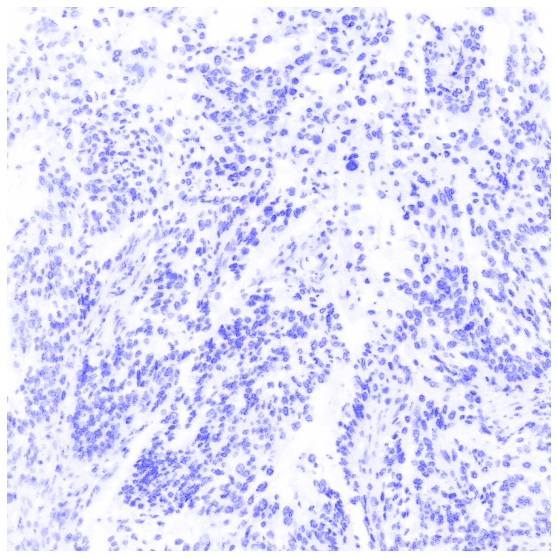

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img_nuclei, my_cmap2, vmax=max2)
ax.axis('off')

(-0.5, 799.5, 799.5, -0.5)

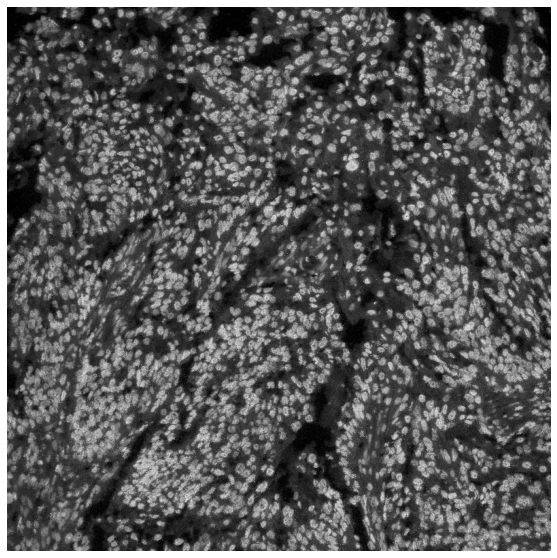

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img_nuclei, vmax=max2, cmap='gray')
ax.axis('off')